In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# Load the secret api key
with open('secrets.json', 'r') as f:
    secrets = json.load(f)

api_key = secrets["apiKey"]

In [23]:
# class that will interact with the FRED API
class FredPy:

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                        "?series_id={seriesID}&api_key={key}&file_type=json" + \
                        "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
        self.token = token

    def get_series(self, seriesID, start, end, units):
        # The URL string with the values inserted into it
        url_formatted = self.url.format(
            seriesID = seriesID, start=start, end=end, units=units, key=self.token
        )
        response = requests.get(url_formatted)

        if (self.token):
            # If the response was successful, extract the data from it
            if (response.status_code == 200):
                data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                    .assign(date=lambda cols: pd.to_datetime(cols['date']))\
                    .assign(value=lambda cols: cols['value'].astype(float))\
                    .rename(columns={'value': seriesID})
                return data
            else:
                raise Exception("Bad response from API, status code = {}".format(response.status_code))
        else:
            raise Exception("You did not specify an API Key.")

In [27]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API Key
fredpy.set_token(api_key)

# Test getting the GDP Series
data = fredpy.get_series(
    seriesID = "GDP",
    start = '2005-01-01',
    end = '2021-01-01',
    units = 'pc1'
)



In [28]:
data

,date,GDP
0,2005-01-01,7.07714
1,2005-04-01,6.68582
2,2005-07-01,6.80467
3,2005-10-01,6.36207
4,2006-01-01,6.51567
...,...,...
60,2020-01-01,2.85432
61,2020-04-01,-6.88168
62,2020-07-01,-0.21500
63,2020-10-01,0.55753


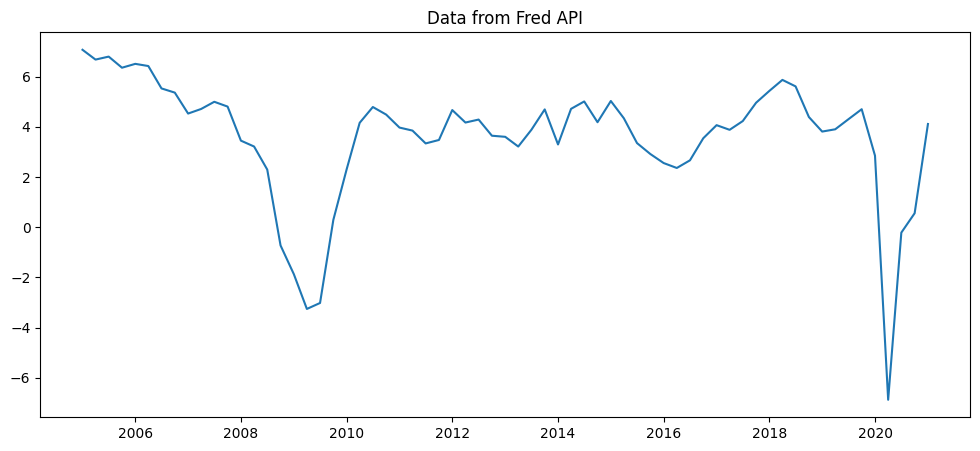

In [33]:
# visualize the series
plt.figure(figsize=(12,5))
plt.plot(data['date'], data['GDP'])
plt.title("Data from Fred API")
plt.show()

In [34]:
# Let's get the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID="UNRATE",
    start = '2005-01-01',
    end = '2021-01-01',
    units = 'lin'
)

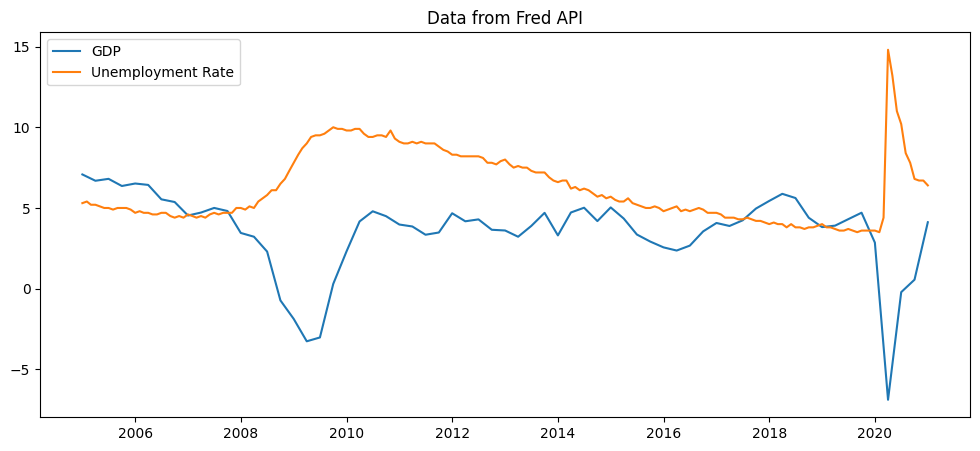

In [40]:
# visualize the series
plt.figure(figsize=(12,5))
plt.plot(data['date'], data['GDP'], label="GDP")
plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label="Unemployment Rate")
plt.title("Data from Fred API")
plt.legend()
plt.show()